**TODO**
- Clean up the lcapy usage

In [1]:
#Library import statements

from skidl.pyspice import *
#can you say cheeky 
import PySpice as pspice
#becouse it's written by a kiwi you know
import lcapy as kiwi

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from IPython.display import YouTubeVideo, display

import traceback

In [2]:
#notebook specific loading control statements 
%matplotlib inline
#tool to log notebook internals
#https://github.com/jrjohansson/version_information
%load_ext version_information
%version_information skidl, PySpice,lcapy, sympy, numpy, matplotlib, pandas, scipy

Software,Version
Python,3.7.6 64bit [GCC 7.3.0]
IPython,7.12.0
OS,Linux 4.19.104 microsoft standard x86_64 with debian bullseye sid
skidl,0.0.31.dev0
PySpice,1.4.3
lcapy,0.75.dev0
sympy,1.6.2
numpy,1.18.1
matplotlib,3.3.0
pandas,1.1.4


In [3]:
from DC_1_Codes import dc_ease, get_skidl_spice_ref

# Controlled Dependent Sources in SPICE
Since we have current and voltage sources and can read voltage and current then there are naturally four linearly dependent controlled souces. And all four of them have their own quirkiness in implementing them in SPICE. We will here go over all four of them starting with the example from ALL ABOUT ELECTRONICS' "Independent and Dependent (Controlled) Sources" with the rest being examples created by this author.

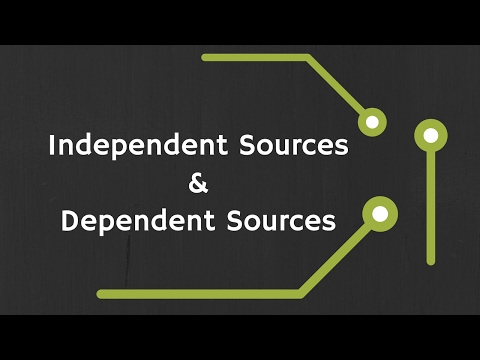

In [4]:
YouTubeVideo('SfKw8bHk7-o', width=500, height=400, start=306)

# CCVS
A Current-Controlled-Voltage-Souce (CCVS) is a source that reads the current through an element and then scales with a gain [V/A], which has the special name transresistance, owing to the units, to the dependent voltage source. Where to measure for the current controlled part we read the current through the element via a series ammeter with polarity opposite to the direction of the current flow we wish to measure. It is functionally equivalent to a Shunt-Shunt feedback circuit. Alais we still do not have a fundamental circuit element that acts as a CCVS. So as ALL ABOUT ELECTRONICS showed we have to build VCVS out of an assembly of fundamental circuit elements. We construct the following example circuit contain a CCVS, analyze it. We will measure the circuit first by doing a dc sweep of the voltage source to try to understand the transresistance gain of the circuit.

In [5]:
reset()
r5=R(ref='5', value=5@u_Ohm)
r2=R(ref='2', value=2@u_Ohm)
r10=R(ref='10', value=10@u_Ohm)
vs=V(ref='vs', dc_value=5@u_V)
ix=V(ref='ix', dc_value=0@u_V)
ccvs=H(transresistance=2, control=get_skidl_spice_ref(ix))

ix['p', 'n']+=r2[2], gnd

ccvs['p', 'n']+=r5[1], gnd
r2[1]+=r5[2]
vs['p', 'n']+=r10[1], r2[1]
r10[2]+=gnd

circ=generate_netlist()
print(circ)

.title 
R5 N_2 N_3 5Ohm
R2 N_3 N_1 2Ohm
R10 N_4 0 10Ohm
Vvs N_4 N_3 5V
Vix N_1 0 0V
H1 N_2 0 Vix 2




No errors or warnings found during netlist generation.



In [6]:
dc_sweep=dc_ease(circ)
dc_sweep.sweep_DF
dc_sweep.sweep_DF.at[get_skidl_spice_ref(vs)]=[0, 10, 1]
dc_sweep.clean_table()
dc_sweep.sweep_DF

,Start,Stop,Step
Element,,,
Vvs,0,10,1


Unit is None for @vix[p] power


Unit is None for @vvs[p] power


Unit is None for @r10[p] power


Unit is None for @r5[p] power


Unit is None for @h1[p] power


Unit is None for @r2[p] power


/mnt/c/Users/strin/Insync/string12oil@gmail.com/Google Drive/MyProjects/python-spice/Python-and-SPICE-Book/DC_1/DC_1_Codes.py:986: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


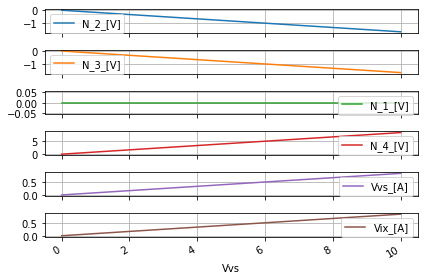

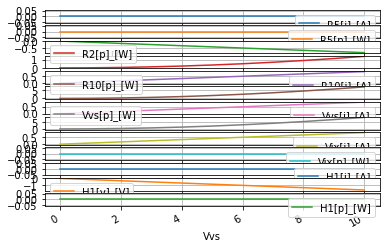

In [7]:
dc_sweep.do_dc_sim(get_skidl_spice_ref(vs))
dc_sweep.do_dc_intsim(get_skidl_spice_ref(vs))
dc_sweep.quick_plot()
dc_sweep.quick_plot('int')

In [8]:
dc_sweep.dc_resultsNB_DF

,N_2_[V],N_3_[V],N_1_[V],N_4_[V],Vvs_[A],Vix_[A]
Vvs,,,,,,
0.0,0.000000,0.000000,0.0,0.000000,-0.000000,-0.000000
1.0,-0.166667,-0.166667,0.0,0.833333,0.083333,0.083333
2.0,-0.333333,-0.333333,0.0,1.666667,0.166667,0.166667
3.0,-0.500000,-0.500000,0.0,2.500000,0.250000,0.250000
4.0,-0.666667,-0.666667,0.0,3.333333,0.333333,0.333333
5.0,-0.833333,-0.833333,0.0,4.166667,0.416667,0.416667
6.0,-1.000000,-1.000000,0.0,5.000000,0.500000,0.500000
7.0,-1.166667,-1.166667,0.0,5.833333,0.583333,0.583333
8.0,-1.333333,-1.333333,0.0,6.666667,0.666667,0.666667


In [9]:
dc_sweep.dc_resultsINT_DF

,R5[i]_[A],R5[p]_[W],R2[i]_[A],R2[p]_[W],R10[i]_[A],R10[p]_[W],Vvs[i]_[A],Vvs[p]_[W],Vix[i]_[A],Vix[p]_[W],H1[i]_[A],H1[v]_[V],H1[p]_[W]
Vvs,,,,,,,,,,,,,
0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.0,0.0,0.000000,0.0
1.0,0.0,0.0,-0.083333,0.013889,0.083333,0.069444,0.083333,0.083333,0.083333,0.0,0.0,-0.166667,-0.0
2.0,0.0,0.0,-0.166667,0.055556,0.166667,0.277778,0.166667,0.333333,0.166667,0.0,0.0,-0.333333,-0.0
3.0,0.0,0.0,-0.250000,0.125000,0.250000,0.625000,0.250000,0.750000,0.250000,0.0,0.0,-0.500000,-0.0
4.0,0.0,0.0,-0.333333,0.222222,0.333333,1.111111,0.333333,1.333333,0.333333,0.0,0.0,-0.666667,-0.0
5.0,0.0,0.0,-0.416667,0.347222,0.416667,1.736111,0.416667,2.083333,0.416667,0.0,0.0,-0.833333,-0.0
6.0,0.0,0.0,-0.500000,0.500000,0.500000,2.500000,0.500000,3.000000,0.500000,0.0,0.0,-1.000000,-0.0
7.0,0.0,0.0,-0.583333,0.680556,0.583333,3.402778,0.583333,4.083333,0.583333,0.0,0.0,-1.166667,-0.0
8.0,0.0,0.0,-0.666667,0.888889,0.666667,4.444444,0.666667,5.333333,0.666667,0.0,0.0,-1.333333,-0.0


In [10]:
Tranres_data=dc_sweep.dc_resultsNB_DF[[node(ccvs['p'])+'_[V]', get_skidl_spice_ref(ix)+'_[A]']]
Tranres_data

,N_2_[V],Vix_[A]
Vvs,,
0.0,0.000000,-0.000000
1.0,-0.166667,0.083333
2.0,-0.333333,0.166667
3.0,-0.500000,0.250000
4.0,-0.666667,0.333333
5.0,-0.833333,0.416667
6.0,-1.000000,0.500000
7.0,-1.166667,0.583333
8.0,-1.333333,0.666667


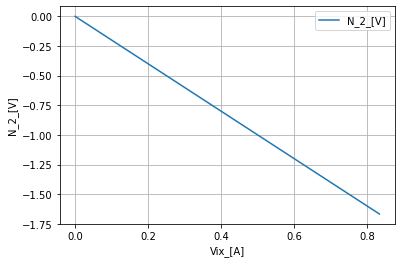

In [11]:
Tranres_data.plot(x='Vix_[A]', y=node(r5[1])+'_[V]', ylabel=node(r5[1])+'_[V]', grid=True);

In [12]:
MeasTranRes, _ =np.polyfit(Tranres_data['Vix_[A]'], Tranres_data[node(r5[1])+'_[V]'], 1)
np.around(MeasTranRes, 3)

# Enter the SPICE transfer function

Why isn't it 2; because we are looking at the effect of the whole circuit on the output node and input current. So what we need is a way to find the transfer function in a more controlled manner, enter the .tf. The transfer function is not misnamed. Normally we think Transfer function in EE we think of something with information about poles and zeros. While we will get that in the next chapter with .pz but here where still in DC. And so recalling that a transfer function also has a fundamental gain "$K$" called in terms of circuit’s DC gain or intrinsic gain. That is what .tf measures along with the input and output resistance. However, .tf is one of the most mysterious and honestly pain the butt SPICE analysis. But besides finding $K$ .tf also gives us the DC resistance (so pure resistance only) of the input and output of the measurement. For a refresher for the importance of this see ALL ABOUT ELECTRONICS video on "What is Impedance? The Input Impedance and Output Impedance Explained".

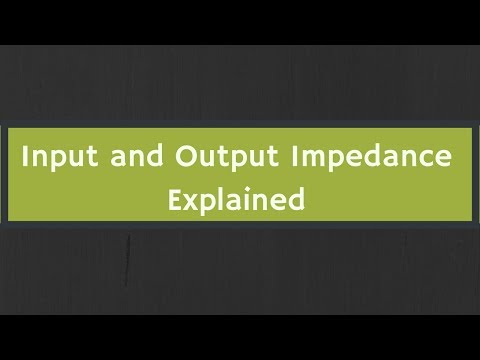

In [13]:
YouTubeVideo('7jw2_x8dyQ8', width=500, height=400, start=290)

I will say that that the rules of thumb about the input impedance being as high as possible and the output impedance being as low as possible are based on basic limit analysis for voltage. For in real applications we pull and source as much voltage and current as is optimal for both the source and to meet the load operating requirements. We will discuss this in much further detail as we proceed in this book.

## Using .tf

In order to use this .tf we must measure from a single source. Then to measure an output voltage we can tell it the output node pair via `V(<node1>, <node2>)` or give it another single voltage source. In the case of measuring the output current, we must give it a voltage source to get the current from via the SPICE ammeter trick. Lets now apply this to our CCVS example

In [14]:
reset()
r5=R(ref='5', value=5@u_Ohm)
r2=R(ref='2', value=2@u_Ohm)
r10=R(ref='10', value=10@u_Ohm)
vs=V(ref='vs', dc_value=5@u_V)
ix=V(ref='ix', dc_value=0@u_V)
ccvs=H(transresistance=2, control=get_skidl_spice_ref(ix))

itest=I(ref='test_source', dc_value=1@u_A)

itest['n', 'p']+=gnd, ix['n']

ix['p']+=r2[2]

ccvs['p', 'n']+=r5[1], gnd
r2[1]+=r5[2]
vs['p', 'n']+=r10[1], r2[1]
r10[2]+=gnd

circ=generate_netlist()
print(circ)

.title 
R5 N_3 N_4 5Ohm
R2 N_4 N_2 2Ohm
R10 N_5 0 10Ohm
Vvs N_5 N_4 5V
Vix N_2 N_1 0V
H1 N_3 0 Vix 2
Itest_source N_1 0 1A




No errors or warnings found during netlist generation.



In [15]:
sim=circ.simulator()
dc_tf=sim.tf('V(N3, 0)', 'Itest_source')

In [16]:
dc_tf.nodes

{'output_impedance_at_V(n3,0)': WaveForm output_impedance_at_V(n3,0) [1.]@V,
 'itest_source#Input_impedance': WaveForm itest_source#Input_impedance [4.]@V,
 'Transfer_function': WaveForm Transfer_function [0.]@V}

In [17]:
for k,v in dc_tf.nodes.items():
    print(k, v.as_ndarray())

output_impedance_at_V(n3,0) [1.]
itest_source#Input_impedance [4.]
Transfer_function [0.]


So .tf can be a pain to use further depenind on the compintion of inputs and outputs being meassured can yield diffint output statments. So we have already abstricted this away so that it's much easter to use and gives presnitne that outputs coonsisintly. And as we will dicues on in the next section is has real limitations and is just being introduced here. However, that is not to say it donst have use. As we will see when we start working with transiters .tf will have emmince usage. 

In [18]:
#%%writefile -a DC_1_Codes.py

#chapter 1 section 4 easy_tf class
# class to make using the SPICE .tf function so much less of a pain
# has methods to all four case usages

class easy_tf():
    """
    Wraper tool for ngspice's to make performing trnafer function (.tf) anyslis
    a lot less of a headeach
    """
    def __init__(self, circ_netlist_obj):
        """
        Intialztoin method
        
        Args:
            circ_netlist_obj (pspice.Spice.Netlist.Circuit): the Netlist circuit produced 
                from SKiDl's `generate_netlist()`
        
        Returns:
            creates a simation from the netlist in `self.sim`
        
        TODO: add kwargs to pass to sim creation

        """
        
        self.circ_netlist_obj=circ_netlist_obj
        #create the sim
        self.sim=self.circ_netlist_obj.simulator()
    
    
    def dc_voltage_gain(self, input_voltage_source, output_node_pos=None , output_node_neg='0', output_voltag_source=None):
        """
        method to perfom .tf to measur an input voltage souce to either a node pair
        wich is eqivlint to the SPICE statoemt
        ```
        .tf(V(<node_1>, <node_2>) , <voltage_souce_in>)
        ```
        where `<node_2>` can be ommited where then seconed node is always the ground node
        or a seconed output voltage souce can be used in wich case this meothd is then eqivlitnt to 
        ```
        .tf(<voltage_souce_out> , <voltage_souce_in>)
        ```
        it will retun the input resitince looking from the input souce to the output measure, the ouput resitince looking
        from the ouput meassue to the input voltage souce, and finaly the voltage gain of the input voltage souce to ouput meassure
        
        Args:
            input_voltage_source (SKiDl Linear Voltage Souce obj): the input voltage souce given as a SKiDl linear depened voltage souce like
                object. 
            
            output_node_pos (SKiDL net obj or SPICE net name str; None): If using a voltage souce as the ouput measurment this may be left as None
                else must be filled in with eather a SPICE net name as a string or a SKiDl net complint object where the SPICE
                net name can be exstracted from
            
            output_node_neg (SKiDL net obj or SPICE net name str; '0'): If using a voltage souce as the ouput measurment this may be left as '0' else
                if using measuing from a node pair must be eather a SPICE net name as a string or a SKiDl net complint object where the SPICE
                net name can be exstracted from. If left '0' the measured seconed node of the node pair will be the ground net '0'
            
            output_voltag_source (SKiDl Linear Voltage Souce obj; None): If meauing the ouput from a node pair (`output_node_pos` & `output_node_neg`) this may be 
                left as None. Else when measuing ouput voltge from a voltage souce provined a SKiDl linear depened voltage souce like
                object.
        
        Returns:
            results from this usge of .tf to measre the voltage to voltage gain will be stored in `self.vg_results`
            
        """
        #do assertion check that the input is a voltage source and 
        assert input_voltage_source.ref_prefix=='V', 'voltage gain must be sourced from a voltage source'
        input_src=get_skidl_spice_ref(input_voltage_source)
        
        
        
        #deal with source output
        if output_voltag_source!=None:

            if (output_node_pos!=None) & (output_node_neg!='0'):
                warnings.warn( 'If output measurment is from a `V` source, nodes node output location will be ignored')
            #creat the output statment
            output_src=f'V({get_skidl_spice_ref(output_voltag_source)})'
            #run the .tf
            self.tf_res=self.sim.tf(output_src, input_src)
            
            
            output_src=output_src[2:-1].replace(", ", "-")
            #create storage
            self.vg_results=pd.DataFrame(columns=['loc', 'value', 'units'])
            
            #store results
            for k, v in self.tf_res.nodes.items():
                if 'Transfer_function' in k:
                    self.vg_results.at['DC_Vgain']=[f'{output_src}/{input_src}', v.as_ndarray()[0], '[V/V]']
                elif 'Input_impedance' in k:
                    self.vg_results.at['Input_resistance']=[input_src, v.as_ndarray()[0], '[Ohm]']
                elif 'output_impedance' in k:
                    self.vg_results.at['Output_resistance']=[output_src, v.as_ndarray()[0], '[Ohm]']
                else:
                    warnings.warn(f'unexspected addintal outputs `{k, v}`')
            
        #deal with node ouput
        else:
            #check the pos node
            assert output_node_pos!=None, 'output node must be specfied when not using a `V` source'
            #TODO need to make this assertion stronger to the cirucit under test
            assert repr(type(output_node_pos))=="<class 'skidl.Net.Net'>" or isinstance(output_node_pos, str), '`output_node_pos` must be a SKiDl net or a node string' 
            if repr(type(output_node_pos))=="<class 'skidl.Net.Net'>":
                pos_node=node(output_node_pos)
            else:
                pos_node=output_node_pos
            
            #check the neg node
            #TODO need to make this assertion stronger to the cirucit under test
            assert repr(type(output_node_neg))=="<class 'skidl.Net.Net'>" or isinstance(output_node_neg, str), '`output_node_neg` must be a SKiDl net or a node string' 
            if repr(type(output_node_neg))=="<class 'skidl.Net.Net'>":
                neg_node=node(output_node_neg)
            else:
                neg_node=output_node_neg
                
            #formulate the output statment
            output_src=f'V({pos_node}, {neg_node})'
            
            #run the tf
            self.tf_res=self.sim.tf(output_src, input_src)
            
            self.vg_results=pd.DataFrame(columns=['loc', 'value', 'units'])
            
            output_src='('+output_src[2:-1].replace(", ", "-")+')'
            #store results
            for k, v in self.tf_res.nodes.items():
                if 'Transfer_function' in k:
                    self.vg_results.at['DC_Vgain']=[f'{output_src}/{input_src}', v.as_ndarray()[0], '[V/V]']
                elif 'Input_impedance' in k:
                    self.vg_results.at['Input_resistance']=[input_src, v.as_ndarray()[0], '[Ohm]']
                elif 'output_impedance' in k:
                    self.vg_results.at['Output_resistance']=[output_src, v.as_ndarray()[0], '[Ohm]']
                else:
                    warnings.warn(f'unexspected addintal outputs `{k, v}`')

        
            
        

        
    
    def dc_current_gain(self, input_current_source, output_ammeter):
        """
        method to perfom .tf to measur a input current souce to ouput ammeter
        
        wich is eqivlint to the SPICE statoemt
        ```
        .tf(I(<output_ammeter>) , <input_current_source>)
        ```
        it will retun the input resitince looking from the input souce to the output measure, the ouput resitince looking
        from the ouput meassue to the input current souce, and finaly the current gain of the input current souce to ouput meassure
        
        Args:
            input_current_source (SKiDl Linear Current Souce obj): the input current souce given as a SKiDl linear depened current souce like
                object. 
           
            output_ammeter (SKiDl Linear Voltage Souce obj; None): This may be a already esisitng linear voltage souce or a 0V linear voltage souce 
                SPICE ammeater add speficly to meassure the current
        
        Returns:
            results from this usge of .tf to measre the current to current gain will be stored in `self.ig_results`
            
        """
        assert input_current_source.ref_prefix=='I', 'current gain must be sourced from a current source'
        assert output_ammeter.ref_prefix=='V', 'current gain must be meassured from a voltage source'
        
        input_src=get_skidl_spice_ref(input_current_source)
        output_src=get_skidl_spice_ref(output_ammeter)
        
        self.tf_res=self.sim.tf(f'I({output_src})', input_src)
        
        self.ig_results=pd.DataFrame(columns=['loc', 'value', 'units'])
            
        for k, v in self.tf_res.nodes.items():
            if 'Transfer_function' in k:
                self.ig_results.at['DC_Igain']=[f'{output_src}/{input_src}', v.as_ndarray()[0], '[A/A]']
            elif 'Input_impedance' in k:
                self.ig_results.at['Input_resistance']=[input_src, v.as_ndarray()[0], '[Ohm]']
            elif 'Output_impedance' in k:
                self.ig_results.at['Output_resistance']=[output_src, v.as_ndarray()[0], '[Ohm]']
            else:
                warnings.warn(f'unexspected addintal outputs `{k, v}`')


    
    def dc_transresistance(self, input_current_source, output_node_pos=None , output_node_neg='0', output_voltag_source=None):
        
        """
        method to perfom .tf to fine the output voltge to input current.
        via measuring from an input current souce to either a node pair
        wich is eqivlint to the SPICE statoemt
        ```
        .tf(V(<node_1>, <node_2>) , <current_souce_in>)
        ```
        where `<node_2>` can be ommited where then seconed node is always the ground node
        or a seconed output voltage souce can be used in wich case this meothd is then eqivlitnt to 
        ```
        .tf(<voltage_souce_out> , <current_souce_in>)
        ```
        it will retun the input resitince looking from the input souce to the output measure, the ouput resitince looking
        from the ouput meassue to the input voltage souce, and finaly the transriseiince [A/V] gain of the input current souce to ouput meassure
        
        Args:
            input_voltage_source (SKiDl Linear Current Souce obj): the input current souce given as a SKiDl linear depened current souce like
                object. 
            
            output_node_pos (SKiDL net obj or SPICE net name str; None): If using a voltage souce as the ouput measurment this may be left as None
                else must be filled in with eather a SPICE net name as a string or a SKiDl net complint object where the SPICE
                net name can be exstracted from
            
            output_node_neg (SKiDL net obj or SPICE net name str; '0'): If using a voltage souce as the ouput measurment this may be left as '0' else
                if using measuing from a node pair must be eather a SPICE net name as a string or a SKiDl net complint object where the SPICE
                net name can be exstracted from. If left '0' the measured seconed node of the node pair will be the ground net '0'
            
            output_voltag_source (SKiDl Linear Voltage Souce obj; None): If meauing the ouput from a node pair (`output_node_pos` & `output_node_neg`) this may be 
                left as None. Else when measuing ouput voltge from a voltage souce provined a SKiDl linear depened voltage souce like
                object.
        
        Returns:
            results from this usge of .tf to measre the current to voltage gain will be stored in `self.tr_results`
            
        """
        assert input_current_source.ref_prefix=='I', 'transresistance gain must be sourced from a current source'
        input_src=get_skidl_spice_ref(input_current_source)
        
        #deal with node or source output
        if output_voltag_source!=None:

            if (output_node_pos!=None) & (output_node_neg!='0'):
                warnings.warn( 'If output measurment is from a `V` source, nodes node output location will be ignored')

            output_src=f'V({get_skidl_spice_ref(output_voltag_source)})'
            self.tf_res=self.sim.tf(output_src, input_src)
            
            
            output_src=output_src[2:-1].replace(", ", "-")
            
            self.tr_results=pd.DataFrame(columns=['loc', 'value', 'units'])
            
            for k, v in self.tf_res.nodes.items():
                if 'Transfer_function' in k:
                    self.tr_results.at['DC_Transresistance']=[f'{output_src}/{input_src}', v.as_ndarray()[0], '[V/A]']
                elif 'Input_impedance' in k:
                    self.tr_results.at['Input_resistance']=[input_src, v.as_ndarray()[0], '[Ohm]']
                elif 'output_impedance' in k:
                    self.tr_results.at['Output_resistance']=[output_src, v.as_ndarray()[0], '[Ohm]']
                else:
                    warnings.warn(f'unexspected addintal outputs `{k, v}`')
            
        
        else:
            assert output_node_pos!=None, 'output node must be specfied when not using a `V` source'
            #TODO need to make this assertion stronger to the cirucit under test
            assert repr(type(output_node_pos))=="<class 'skidl.Net.Net'>" or isinstance(output_node_pos, str), '`output_node_pos` must be a SKiDl net or a node string' 
            if repr(type(output_node_pos))=="<class 'skidl.Net.Net'>":
                pos_node=node(output_node_pos)
            else:
                pos_node=output_node_pos
            
            #TODO need to make this assertion stronger to the cirucit under test
            assert repr(type(output_node_neg))=="<class 'skidl.Net.Net'>" or isinstance(output_node_neg, str), '`output_node_neg` must be a SKiDl net or a node string' 
            if repr(type(output_node_neg))=="<class 'skidl.Net.Net'>":
                neg_node=node(output_node_neg)
            else:
                neg_node=output_node_neg
                
                
            output_src=f'V({pos_node}, {neg_node})'
            self.output_src=output_src
            
            self.tf_res=self.sim.tf(output_src, input_src)
            
            self.tr_results=pd.DataFrame(columns=['loc', 'value', 'units'])
            
            output_src='('+output_src[2:-1].replace(", ", "-")+')'
        
            for k, v in self.tf_res.nodes.items():
                if 'Transfer_function' in k:
                    self.tr_results.at['DC_Transresistance']=[f'{output_src}/{input_src}', v.as_ndarray()[0], '[V/A]']
                elif 'Input_impedance' in k:
                    self.tr_results.at['Input_resistance']=[input_src, v.as_ndarray()[0], '[Ohm]']
                elif 'output_impedance' in k:
                    self.tr_results.at['Output_resistance']=[output_src, v.as_ndarray()[0], '[Ohm]']
                else:
                    warnings.warn(f'unexspected addintal outputs `{k, v}`')
    
    def dc_transconductance(self, input_voltage_source, output_ammeter):
        """
        method to perfom .tf to measur a input voltage souce to an ouput ammeater
        
        wich is eqivlint to the SPICE statoemt
        ```
        .tf(I(<output_ammeter>) , <input_voltage_source>)
        ```
        
        
        it will retun the input resitince looking from the input souce to the output measure, the ouput resitince looking
        from the ouput meassue to the input current souce, and finaly the transconductance gain of the input current souce to ouput meassure
        
        Args:
            input_voltage_source (SKiDl Linear Voltage Souce obj): the input Voltage souce given as a SKiDl linear depened Voltage souce like
                object. 
           
            output_ammeter (SKiDl Linear Voltage Souce obj; None): This may be a already esisitng linear voltage souce or a 0V linear voltage souce 
                SPICE ammeater add speficly to meassure the current
        
        Returns:
            results from this usge of .tf to measre the current to current gain will be stored in `self.tc_results`
            
        """
        assert input_voltage_source.ref_prefix=='V', 'transconductance gain must be sourced from a voltage source'
        
        input_src=get_skidl_spice_ref(input_voltage_source)

        assert output_ammeter.ref_prefix=='V', 'transconductance gain must be meassured from a voltage source'

        output_src=f'I({get_skidl_spice_ref(output_ammeter)})'
            
        self.tf_res=self.sim.tf(output_src, input_src)


        output_src=output_src[2:-1].replace(", ", "-")

        self.tc_results=pd.DataFrame(columns=['loc', 'value', 'units'])

        for k, v in self.tf_res.nodes.items():
            if 'Transfer_function' in k:
                self.tc_results.at['DC_Transconductance']=[f'{output_src}/{input_src}', v.as_ndarray()[0], '[A/V]']
            elif 'Input_impedance' in k:
                self.tc_results.at['Input_resistance']=[input_src, v.as_ndarray()[0], '[Ohm]']
            elif 'Output_impedance' in k:
                self.tc_results.at['Output_resistance']=[output_src, v.as_ndarray()[0], '[Ohm]']
            else:
                warnings.warn(f'unexspected addintal outputs `{k, v}`')
    
        

Start testing `easy_tf` with the exisitng cirucit used for CCVS exsample to test `easy_tf` `.dc_voltage_gain`

In [19]:
test=easy_tf(circ)

In [20]:
test.dc_voltage_gain(vs, output_voltag_source=ix)
test.vg_results

,loc,value,units
Output_resistance,Vix,1,[Ohm]
Input_resistance,Vvs,15,[Ohm]
DC_Vgain,Vix/Vvs,0,[V/V]


In [21]:
test.dc_voltage_gain(vs, 'N2')
test.vg_results

,loc,value,units
Output_resistance,(N2-0),1,[Ohm]
Input_resistance,Vvs,15,[Ohm]
DC_Vgain,(N2-0)/Vvs,0,[V/V]


In [22]:
test.dc_voltage_gain(vs, 'N2', node(r5['n']))
test.vg_results

,loc,value,units
Output_resistance,(N2-N_4),4.33333,[Ohm]
Input_resistance,Vvs,15,[Ohm]
DC_Vgain,(N2-N_4)/Vvs,0.333333,[V/V]


modify the ccvs example with a current source to test the other methods (modes) of .tf measurement

In [23]:
reset()
r5=R(ref='5', value=5@u_Ohm)
r2=R(ref='2', value=2@u_Ohm)
r10=R(ref='10', value=10@u_Ohm)
vs=V(ref='vs', dc_value=5@u_V)
ix=V(ref='ix', dc_value=0@u_V)
ccvs=H(transresistance=2, control=get_skidl_spice_ref(ix))

itest=I(ref='test_source', dc_value=1@u_A)

itest['n', 'p']+=gnd, ix['n']

ix['p']+=r2[2]

ccvs['p', 'n']+=r5[1], gnd
r2[1]+=r5[2]
vs['p', 'n']+=r10[1], r2[1]
r10[2]+=gnd

circ=generate_netlist()
print(circ)

test=easy_tf(circ)
test.dc_current_gain(itest, vs)
test.ig_results


No errors or warnings found during netlist generation.



.title 
R5 N_3 N_4 5Ohm
R2 N_4 N_2 2Ohm
R10 N_5 0 10Ohm
Vvs N_5 N_4 5V
Vix N_2 N_1 0V
H1 N_3 0 Vix 2
Itest_source N_1 0 1A



,loc,value,units
Output_resistance,Vvs,1e+20,[Ohm]
Input_resistance,Itest_source,4,[Ohm]
DC_Igain,Vvs/Itest_source,0.2,[A/A]


In [24]:
test.dc_transresistance(itest, output_voltag_source=vs)
test.tr_results

,loc,value,units
Output_resistance,Vvs,1,[Ohm]
Input_resistance,Itest_source,4,[Ohm]
DC_Transresistance,Vvs/Itest_source,0,[V/A]


In [25]:
test.dc_transresistance(itest, 'N5')
test.tr_results

,loc,value,units
Output_resistance,(N5-0),1,[Ohm]
Input_resistance,Itest_source,4,[Ohm]
DC_Transresistance,(N5-0)/Itest_source,0,[V/A]


In [26]:
test.dc_transconductance(vs, ix)
test.tc_results

,loc,value,units
Output_resistance,Vix,1e+20,[Ohm]
Input_resistance,Vvs,15,[Ohm]
DC_Transconductance,Vix/Vvs,0,[A/V]


We see that our tool to handle the .tf `easy_tf` makes working with the .tf function a lot easer and gives a much more consisitnt ouput record then using .tf alone

# LCAPY

Lcapy is the work of a new zealand profices at the unverity of cantupry, hence the ailes of kiwi since we done want clashing names spice with cirucit as it allies in it's docs. Lcapy is not a cirucit simulator insted its one part linear anyliticl cirucit anylsis tool and one part schmitcs drawing tool via a wrarping of LaTeX's alsdkjflj cirucit drawing tool. In this section we will just use is schmatic draing features. Though it's ability to perform clautiona agines netlist via anylistc genrating the modfied nodal matrix (wich is part of what SPICE does) are also of great value.

# VCVS
A Voltage-Controled-Voltage-Souce (VCVS) is a souce that reads the differintal voltage between two nodes and then scales that gain [V/V] to the depenetet voltage souce. It is funtinaly equivlint to a Sereis-Shunt feedback cirucit. Alais we still do not have a fundmental cirucit elelemtn that acts as a VCVS. So as ALL ABOUT ELELCTRONICS showed we have to build VCVS out of assemply of fundmantal cirucit elelemtns. We constuct the fillowing exsample ciricut contina a vcvs, anylize it and show its sshmatic with lacapy just below

In [27]:
reset()
net_1=Net('1'); net_2=Net('2'); net_3=Net('3'); net_4=Net('4')

vs=V(ref='vs', dc_value=50@u_V); vs['p', 'n']+=net_1, gnd
r1=R(ref='1', value=1@u_kOhm); r1[1, 2]+=net_1, net_2
r2=R(ref='2', value=2@u_kOhm); r2[1, 2]+=net_2, gnd
r3=R(ref='3', value=500@u_Ohm); r3[1, 2]+=net_3, net_4
r4=R(ref='open', value=1e16); r4[1, 2]+=net_4, gnd
vcvs=E(gain=5); vcvs['ip', 'in'] += net_2, gnd; vcvs['op', 'on'] += net_3, gnd


circ=generate_netlist()
print(circ)

test=easy_tf(circ)
test.dc_voltage_gain(vs, node(net_4), node(gnd))
test.vg_results

.title 
Vvs 1 0 50V
R1 1 2 1kOhm
R2 2 0 2kOhm
R3 3 4 500Ohm
Ropen 4 0 1e+16
E1 3 0 2 0 5




No errors or warnings found during netlist generation.



,loc,value,units
Output_resistance,(4-0),500,[Ohm]
Input_resistance,Vvs,3000,[Ohm]
DC_Vgain,(4-0)/Vvs,3.33333,[V/V]


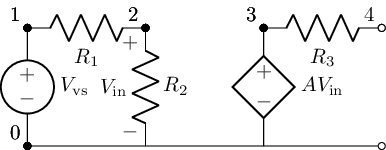

In [28]:
vcvs_exc=kiwi.Circuit()
vcvs_exc.add('Vvs 1 0; down')
vcvs_exc.add('R1 1 2; right')
vcvs_exc.add('R2 2 0_1; down, v=V_{in}')
vcvs_exc.add('W 0 0_1; right')
vcvs_exc.add('W 0_1 0_2; right')
vcvs_exc.add('E1 3 0_2 2 0_1; down, l=AV_{in}')
vcvs_exc.add('R3 3 4; right')
vcvs_exc.add('W 0_2 0_3; right')



vcvs_exc.draw()

# CCCS
A Current-Contorled-Current-Source (CCCS) is a source that read the current throgh an element and then scales that gain [A/A] to the dependent current souce. Where agin for any current controled souce we read the current throught the element via a sereis ammeater with pollary opbisite to the direction of the current flow we wish to meassure. It is funtinaly equivlint to a Shunt-Series feedback cirucit. And as ALL ABOUT ELELCTICS alluded to this is equivlint to the small signal behavior of a BJT. We constuct the fillowing exsample ciricut contina a CCCS, anylize it and show its sshmatic with lacapy just below. Note that for .tf to meassure current it must have an ammeter to read from so we will add a SPICE ammeater to the output side of our cirucit





In [29]:
reset()
net_1=Net('1'); net_2=Net('2')
cs=I(dc_value=20@u_mA); cs['p', 'n']+=gnd, net_1
r1=R(ref='1', value=50); r1[1, 2]+=net_1, gnd
r2=R(ref='2', value=75); r2[1]+=net_1
r3=R(ref='3', value=75); r3[1, 2]+=net_2, gnd
r4=R(ref='4', value=50); r4[1, 2]+=net_2 , gnd

#add the CCCS sens ammeater
isens=V(ref='sens', dc_value=0@u_V)
#polraty needs to be opsiste of current measure direction
isens['p', 'n']+=gnd, r2[2]

#add another ammeater this time for .tf to read an ouput current
iout=V(ref='out_amm', dc_value=0@u_V); iout['p']+=net_2

#add the CCCS specfiying the contorl ammmeater
cccs=F(ref='_Ai', current_gain=12, control=get_skidl_spice_ref(isens))
#hook up the output of the CCCS
cccs['p', 'n']+=iout['n'], gnd



circ=generate_netlist()
print(circ)

test=easy_tf(circ)
test.dc_current_gain(cs, iout)
test.ig_results

.title 
I1 0 1 20mA
R1 1 0 50
R2 1 N_1 75
R3 2 0 75
R4 2 0 50
Vsens 0 N_1 0V
Vout_amm 2 N_2 0V
F_Ai N_2 0 Vsens 12




No errors or warnings found during netlist generation.



,loc,value,units
Output_resistance,Vout_amm,1e+20,[Ohm]
Input_resistance,I1,30,[Ohm]
DC_Igain,Vout_amm/I1,-4.8,[A/A]


In the lcapy schemaitc below the ammeater for reading the control current and output current for .tf are explicilty shown as ammeaters.

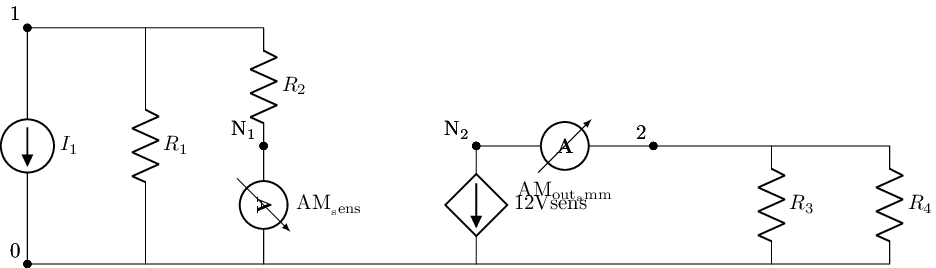

In [30]:
cccs_exc=kiwi.Circuit()

cccs_exc.add('I1 0 1; up')
cccs_exc.add('W 0 0_1; right')
cccs_exc.add('W 1 1_1; right')

cccs_exc.add('R1 1_1 0_1; down')
cccs_exc.add('W 1_1 1_2; right')
cccs_exc.add('W 0_1 0_2; right')

cccs_exc.add('R2 1_2 N_1; down')
cccs_exc.add('AM_sens N_1 0_2; down')
cccs_exc.add('W 0_2 0_3; right=1.8')
cccs_exc.add('F_Ai 0_3 N_2 AM_sens; up, l=12Vsens')
cccs_exc.add('AMout_amm N_2 2; right=1.5')


cccs_exc.add('W 2 2_1; right')
cccs_exc.add('W 0_3 0_4; right=1.5')
cccs_exc.add('R3 2_1 0_4; down')
cccs_exc.add('W 2_1 2_2; right')
cccs_exc.add('W 0_4 0_5; right')
cccs_exc.add('R4 2_2 0_5; down')


cccs_exc.draw()

# VCCS

A Voltage-Controled-Current-Souce (VCCS) is a souce that reads the differintal voltage between two nodes and then scales that gain [A/V], wich has a special name called the transconductance becouse of the units,  to the depenetet current souce. It is funtinaly equivlint to a Sereis-series feedback cirucit. And as ALL ABOUT ELECTROINCS  alluded to a VCCS is the linear aproxmation for the small signal behavior of a FET. We constuct the fillowing exsample ciricut contina a VCCS, anylize it and show its sshmatic with lacapy just below

In [31]:
reset()
net_1=Net('1'); net_2=Net('2'); net_3=Net('3')

vs=V(ref='vs', dc_value=50@u_V); vs['p', 'n']+=net_1, gnd
r1=R(ref='1', value=1@u_kOhm); r1[1, 2]+=net_1, net_2
r2=R(ref='2', value=2@u_kOhm); r2[1, 2]+=net_2, gnd

r3=R(ref='3', value=75); r3[1, 2]+=net_3, gnd
r4=R(ref='4', value=50); r4[1]+=net_3 


#create VCCS and then wire it in 
vccs=G(ref='_Gm',  current_gain=0.5)
vccs['ip', 'in']+= net_2, gnd; vccs['op', 'on']+= gnd, net_3

#ammmetr to meassure ouput current
iammeater=V(ref='ammeater', dc_value=0); iammeater['p', 'n']+=r4[2], gnd

circ=generate_netlist()
print(circ)

test=easy_tf(circ)
test.dc_transconductance(vs, iammeater)
test.tc_results

.title 
Vvs 1 0 50V
R1 1 2 1kOhm
R2 2 0 2kOhm
R3 3 0 75
R4 3 N_1 50
G_Gm 0 3 2 0 0.5
Vammeater N_1 0 0




No errors or warnings found during netlist generation.



,loc,value,units
Output_resistance,Vammeater,1e+20,[Ohm]
Input_resistance,Vvs,3000,[Ohm]
DC_Transconductance,Vammeater/Vvs,0.2,[A/V]


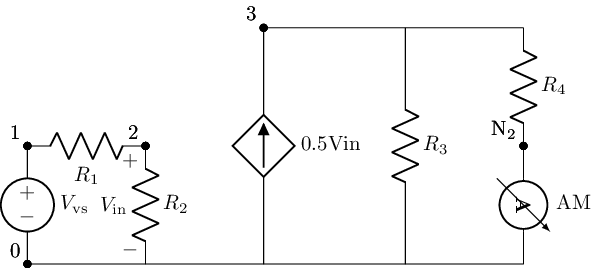

In [32]:
vccs_exc=kiwi.Circuit()
vccs_exc.add('Vvs 1 0; down')
vccs_exc.add('R1 1 2; right')
vccs_exc.add('R2 2 0_1; down, v=V_{in}')
vccs_exc.add('W 0 0_1; right')

vccs_exc.add('W 0_1 0_2; right')
vccs_exc.add('G_Gm 3 0_2 2 0 0.5; down, l=0.5Vin')


vccs_exc.add('W 3 3_1; right=1.2')
vccs_exc.add('W 0_2 0_3; right=1.2')
vccs_exc.add('R3 3_1 0_3; down')
vccs_exc.add('W 3_1 3_2; right')
vccs_exc.add('W 0_3 0_4; right')
vccs_exc.add('R4 3_2 N_2; down')

vccs_exc.add('AM N_2 0_4; down')



vccs_exc.draw()

These are realy basic examples primarly to show how to envoke depented souce in SKiDl and SPICE and secondaly show the usage of the .tf. I say secondaryl cause agian .tf will show it real value later on when dealing with transistors.

## Citations:
[1] ALL ABOUT ELECTRONICS. "Independent and Dependent (Controlled) Sources
," YouTube, Feb 3, 2017. [Video file]. Available: https://youtu.be/SfKw8bHk7-o. [Accessed: Nov 30, 2020].

[2] ALL ABOUT ELECTRONICS. "What is Impedance? The Input Impedance and Output Impedance Explained," YouTube, Jun 28, 2018. [Video file]. Available: https://youtu.be/7jw2_x8dyQ8. [Accessed: Nov 30, 2020].